In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv('./data/ControllerData-ver0.3.csv')
df.shape


(464, 5)

In [31]:
df.sample(10)

,x,y,rx,ry,type
84,-0.262041,-0.161673,-0.933107,0.224489,1
74,-0.020651,-0.340114,-0.575994,-0.749437,1
395,-0.219246,-0.504371,-1.000000,-0.040017,1
285,-0.353375,-0.006281,-0.997943,-0.402052,0
93,-0.112686,0.501517,-0.305805,0.942528,1
100,0.140206,-0.475164,-0.444302,0.752752,1
118,-0.027576,-0.127459,0.407523,-0.807489,0
329,0.018509,0.361553,-0.823870,-0.624513,1
145,0.042621,0.359603,-1.000000,-0.064659,1
363,0.013571,-0.426879,0.017671,-0.571710,1


In [32]:
df.dropna(axis=0, how='any')

,x,y,rx,ry,type
0,0.187561,0.207756,0.057475,0.000381,0
1,-0.438049,-0.225483,0.284041,0.863913,1
2,-0.006805,0.663217,-0.090068,-0.156803,1
3,0.430361,0.448622,-0.134916,-0.032047,1
4,-0.001085,0.587067,-0.489379,-0.032271,1
...,...,...,...,...,...
459,0.160361,-0.871232,-0.821495,-0.701521,1
460,-0.015287,0.516250,-0.988253,0.226958,1
461,0.028582,0.508413,-0.978433,0.454359,1
462,-0.048081,0.709558,-0.636400,0.895064,1


In [33]:
df1 = df.copy()

In [34]:
df1 = df1.round(4)

In [35]:
df1 = df1.dropna(axis=0, how='any')


In [36]:
data_1 = df1.loc[df1['type'] == 1]
data_2 = df1.loc[df1['type'] == 0]
data_2.sample(20)

,x,y,rx,ry,type
79,0.2094,-0.2323,-0.1119,-0.0083,0
95,-0.0643,0.3036,-0.0056,0.0465,0
384,0.1108,0.3616,-0.6246,-0.0777,0
42,0.3254,-0.0180,-0.0571,-0.0529,0
194,0.0718,0.5555,-0.0373,-0.1931,0
25,0.3643,0.1374,-0.0360,-0.0273,0
157,0.0257,-0.3255,0.0864,-0.0737,0
58,0.2252,-0.0777,-0.0704,0.0163,0
156,0.2202,-0.2727,0.0035,-0.0035,0
289,0.2313,-0.4146,0.0118,0.1078,0


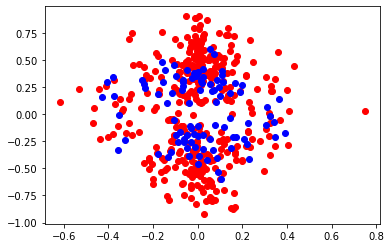

In [37]:
from turtle import color

X_data_1 = pd.DataFrame(data_1, columns=['x'])
Y_data_1 = pd.DataFrame(data_1, columns=['y'])
X_data_2 = pd.DataFrame(data_2, columns=['x'])
Y_data_2 = pd.DataFrame(data_2, columns=['y'])
plt.scatter(X_data_1, Y_data_1, color='red')
plt.scatter(X_data_2, Y_data_2, color='blue')
plt.show()

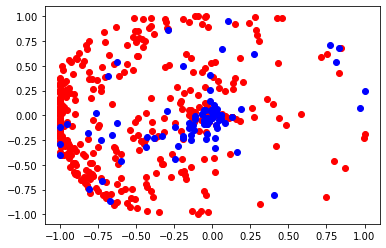

In [38]:
RX_data_1 = pd.DataFrame(data_1, columns=['rx'])
RY_data_1 = pd.DataFrame(data_1, columns=['ry'])
RX_data_2 = pd.DataFrame(data_2, columns=['rx'])
RY_data_2 = pd.DataFrame(data_2, columns=['ry'])
plt.scatter(RX_data_1, RY_data_1, color='red')
plt.scatter(RX_data_2, RY_data_2, color='blue')
plt.show()

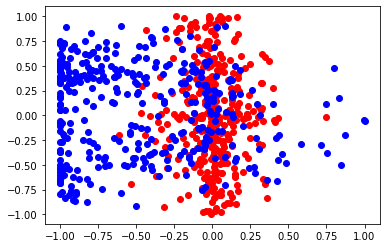

In [39]:
plt.scatter(X_data_1, RY_data_1, color='red')
plt.scatter(RX_data_1, Y_data_1, color='blue')
plt.show()

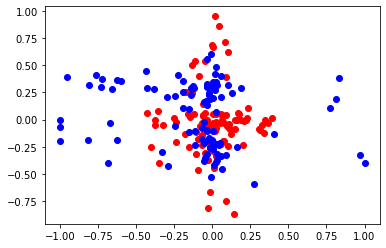

In [40]:
plt.scatter(X_data_2, RY_data_2, color='red')
plt.scatter(RX_data_2, Y_data_2, color='blue')
plt.show()

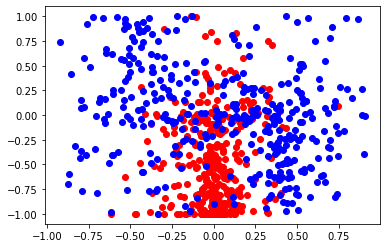

In [41]:
plt.scatter(X_data_1, RX_data_1, color='red')
plt.scatter(Y_data_1, RY_data_1, color='blue')
plt.show()

In [42]:
df_X = df1.loc[:, ['x', 'y', 'rx', 'ry']]
df_y = df1.type

In [43]:
df_y

0      0
1      1
2      1
3      1
4      1
      ..
459    1
460    1
461    1
462    1
463    1
Name: type, Length: 464, dtype: int64

In [44]:
X_train

,x,y,rx,ry
437,0.0890,0.5445,-0.0222,0.0107
344,-0.1459,0.4113,-0.7623,0.0230
453,0.1995,0.2732,0.0176,-0.2312
432,-0.0616,-0.2545,-0.0141,0.1481
178,0.1693,-0.8578,-0.9152,0.4184
...,...,...,...,...
230,0.3445,0.3244,-0.4355,-0.6897
98,-0.0849,0.1922,0.1280,-0.0189
322,0.0116,0.5507,-1.0000,0.1474
382,-0.3785,0.3424,0.0035,-0.0035


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=123)

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7672413793103449
0.7931034482758621


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression())
  ])

poly_log_reg = PolynomialLogisticRegression(degree=3)
poly_log_reg.fit(X_train, y_train)
print(poly_log_reg.score(X_train, y_train))
print(poly_log_reg.score(X_test, y_test))

print('+++++++++++++++++')
y_predict = poly_log_reg.predict(X_test)
print("pricision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ",f1_score(y_test, y_predict))



0.8017241379310345
0.7844827586206896
+++++++++++++++++
pricision:  0.8073394495412844
recall:  0.9565217391304348
f1:  0.8756218905472638


In [48]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='hinge', penalty='elasticnet')
sgdc.fit(X_train, y_train)
print(sgdc.score(X_train, y_train))
print(sgdc.score(X_test, y_test))

0.7873563218390804
0.7931034482758621


In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))
print("+++++++++++++++++++++++++++++")
y_predict = svc.predict(X_test)
print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ", f1_score(y_test, y_predict))

0.8275862068965517
0.8275862068965517
+++++++++++++++++++++++++++++
precision:  0.839622641509434
recall:  0.967391304347826
f1:  0.898989898989899


In [50]:
svc.intercept_

array([1.28036455])

In [51]:
import pickle
pickle.dump(svc, open('svc_model', 'wb'))

In [52]:
pickle.dump(log_reg, open('log_reg', 'wb'))

In [53]:
model = pickle.load(open('svc_model', 'rb'))
y = model.predict(X_test)
print("precision: ", precision_score(y_test, y))

precision:  0.839622641509434


In [54]:
model.predict([["0.11008091156299298","0.40200244463407075","0.05479982724556556","-0.042620798716178306"]])


array([1])